In [10]:
!pip install matplotlib numpy pylint scikit-learn

     ---------------------------------------- 0.0/91.2 kB ? eta -:--:--
     ------------ ------------------------- 30.7/91.2 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 91.2/91.2 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/510.6 kB ? eta -:--:--
   ---------------------------- ----------- 368.6/510.6 kB 7.8 MB/s eta 0:00:01
   ---------------------------------------- 510.6/510.6 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.1/9.2 MB 35.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.5/9.2 MB 44.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.5/9.2 MB 44.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.2/9.2 MB 40.0 MB/s eta 0:00:01
   -----


 Polynomial degree 1 = 
  
3.081 x + 56.61
Error(J) is :  1483296.8727193158

 Polynomial degree 2 = 
            2
-0.003667 x + 4.284 x - 9.527
Error(J) is :  1313151.2901269298

 Polynomial degree 3 = 
            3          2
-4.93e-05 x + 0.0206 x + 1.091 x + 78.82
Error(J) is :  1102094.0062347017

 Polynomial degree 4 = 
            4           3           2
4.429e-07 x - 0.00034 x + 0.08202 x - 3.412 x + 154.2
Error(J) is :  986551.5973036702

 Polynomial degree 5 = 
            5             4             3           2
-4.38e-10 x + 8.022e-07 x - 0.0004449 x + 0.09498 x - 4.025 x + 161.1
Error(J) is :  985788.7795873022

 Polynomial degree 6 = 
             6           5             4            3          2
-6.037e-11 x + 5.9e-08 x - 2.138e-05 x + 0.003448 x - 0.2261 x + 6.648 x + 74.16
Error(J) is :  888248.1060221614


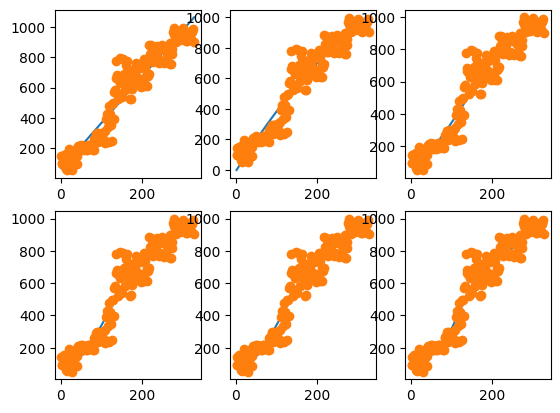

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the datasetCh2_stu.txt file
with open('datasetCh2_stu.txt', 'r') as file:
    data = [list(map(int, line.split())) for line in file.readlines()]

# Extract the first and second columns as X and Y values
x_values, y_values = zip(*data)

xp = np.arange(min(x_values), max(x_values) + 1, 0.01)  # array with 100 points between min(x_values) and max(x_values)
yp = []
e = []
ep = []
j = []

# for in range( start, stop, step)
for i in range(1, 7, 1):
    # print("\nRound ", i)
    p = np.polyfit(x_values, y_values, i)
    # constructing polynomial
    p = np.poly1d(p)
    print("\n Polynomial degree", i, "= \n", p)
    # print("coefficients of degree", i, " is :", p)
    yp[:] = np.polyval(p, xp)
    e[:] = (np.polyval(p, x_values) - y_values)
    e = np.array(e)  # change to matrix
    ep = e * e  # matrix operation
    j = sum(ep)
    print("Error(J) is : ", j)
    d = plt.subplot(2, 3, i)
    d.plot(xp, yp[:], x_values, y_values, 'o')

plt.show()


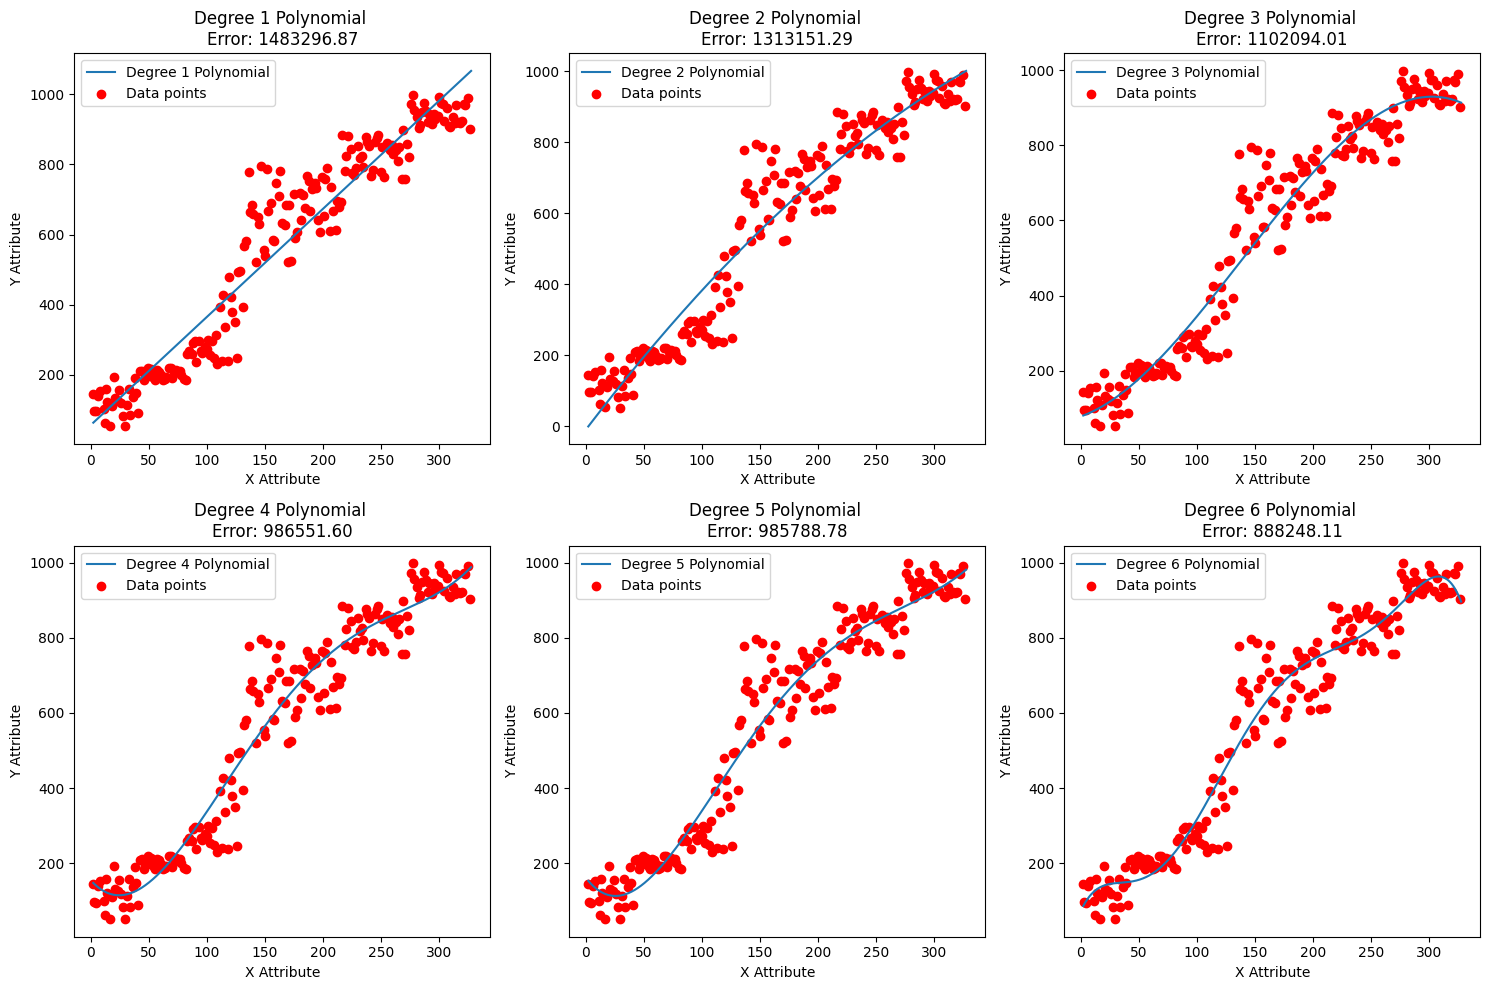

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the datasetCh2_stu.txt file
with open('datasetCh2_stu.txt', 'r') as file:
    data = [list(map(int, line.split())) for line in file.readlines()]

# Extract the first and second columns as X and Y values
x_values, y_values = zip(*data)

xp = np.arange(min(x_values), max(x_values) + 1, 0.01)  # array with 100 points between min(x_values) and max(x_values)

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate through polynomial degrees
for i in range(1, 7, 1):
    p = np.polyfit(x_values, y_values, i)
    p = np.poly1d(p)
    
    # Calculate polynomial values for the entire range
    yp = np.polyval(p, xp)
    
    # Calculate error
    e = np.polyval(p, x_values) - y_values
    error = np.sum(e**2)
    
    # Plot the data and the polynomial fit
    ax = axs[(i-1)//3, (i-1)%3]
    ax.plot(xp, yp, label=f'Degree {i} Polynomial')
    ax.scatter(x_values, y_values, color='red', label='Data points', marker='o')
    
    # Add labels and legend
    ax.set_title(f'Degree {i} Polynomial \nError: {error:.2f}')
    ax.set_xlabel('X Attribute')
    ax.set_ylabel('Y Attribute')
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
